In [1]:
# competition link: https://www.kaggle.com/competitions/playground-series-s3e16/overview/description
# Original Dataset Link: https://www.kaggle.com/datasets/sidhus/crab-age-prediction
# Evaluation Criteria: Mean Absolute Error (MAE),

In [49]:
# Imorting Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
sns.set_context('paper')#sets the size of the charts
style.use('ggplot')


In [50]:
# Reading data
df = pd.read_csv('train.csv')
df_org = pd.read_csv('CrabAgePrediction.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('CrabAgePrediction.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [52]:
# No Null values


In [53]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [54]:
df

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [55]:
# Since id is not requeired, we drop this
df.drop('id', 1, inplace=True)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_73758/2625691128.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('id', 1, inplace=True)


In [56]:
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8


In [57]:
df_fin = pd.concat([df, df_org])

In [58]:
df_fin.reset_index(drop=True, inplace=True)

In [59]:
df_fin

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
77939,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
77940,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
77941,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
77942,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [60]:
df_fin.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [61]:
df_fin.drop_duplicates(inplace=True)

In [62]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77944 entries, 0 to 77943
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             77944 non-null  object 
 1   Length          77944 non-null  float64
 2   Diameter        77944 non-null  float64
 3   Height          77944 non-null  float64
 4   Weight          77944 non-null  float64
 5   Shucked Weight  77944 non-null  float64
 6   Viscera Weight  77944 non-null  float64
 7   Shell Weight    77944 non-null  float64
 8   Age             77944 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.9+ MB


In [63]:
# Exploratory Data Analysis

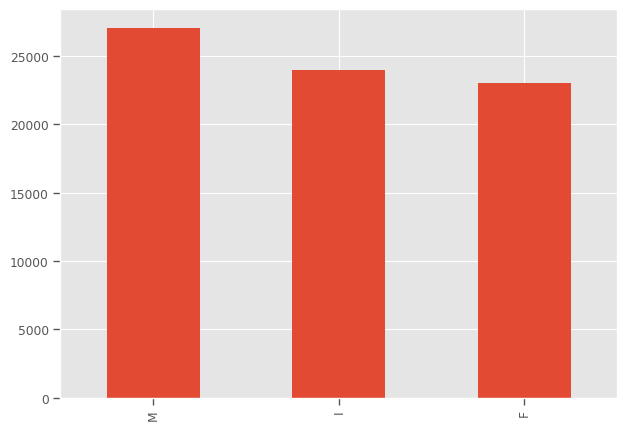

<Figure size 1000x800 with 0 Axes>

In [64]:
df['Sex'].value_counts().plot.bar()
plt.figure(figsize=(10,8))
plt.show()

<AxesSubplot: ylabel='Frequency'>

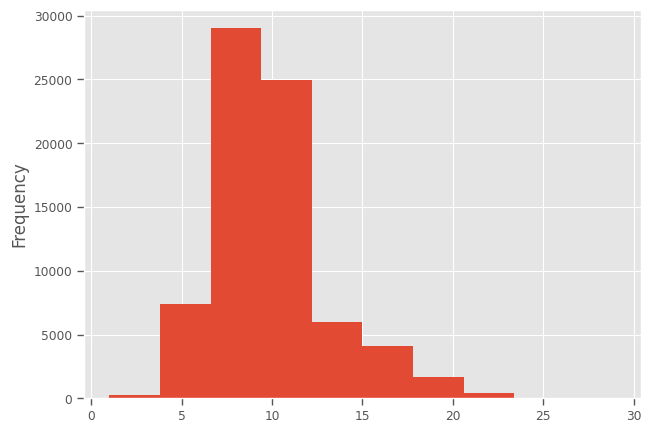

In [65]:
df['Age'].plot.hist()

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_73758/2068283718.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fin.corr(), annot=True, cmap='coolwarm')


<AxesSubplot: >

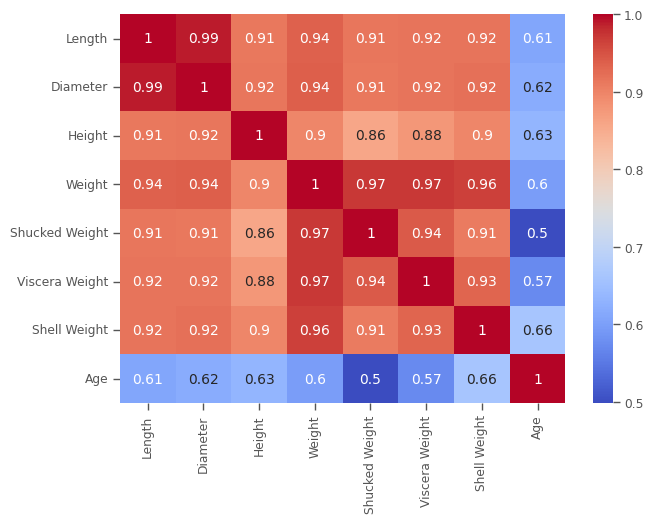

In [66]:
sns.heatmap(df_fin.corr(), annot=True, cmap='coolwarm')

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_73758/3654481556.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(df_fin.drop(['Diameter','Shucked Weight','Viscera Weight', 'Shell Weight'],1).corr(), annot=True)
/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_73758/3654481556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fin.drop(['Diameter','Shucked Weight','Viscera Weight', 'Shell Weight'],1).corr(), annot=True)


<AxesSubplot: >

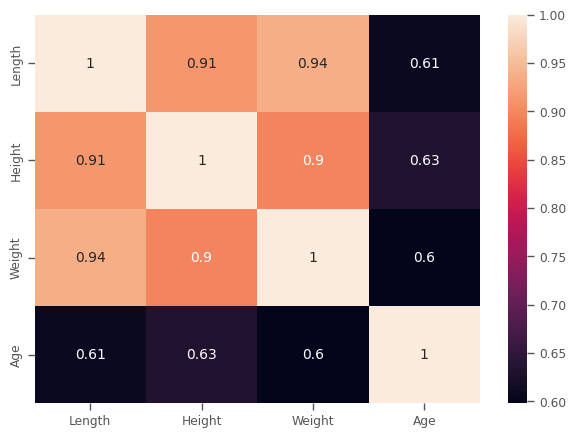

In [67]:
sns.heatmap(df_fin.drop(['Diameter','Shucked Weight','Viscera Weight', 'Shell Weight'],1).corr(), annot=True)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_73758/666624077.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  for i, column1 in enumerate(df.drop('Sex',1).columns):


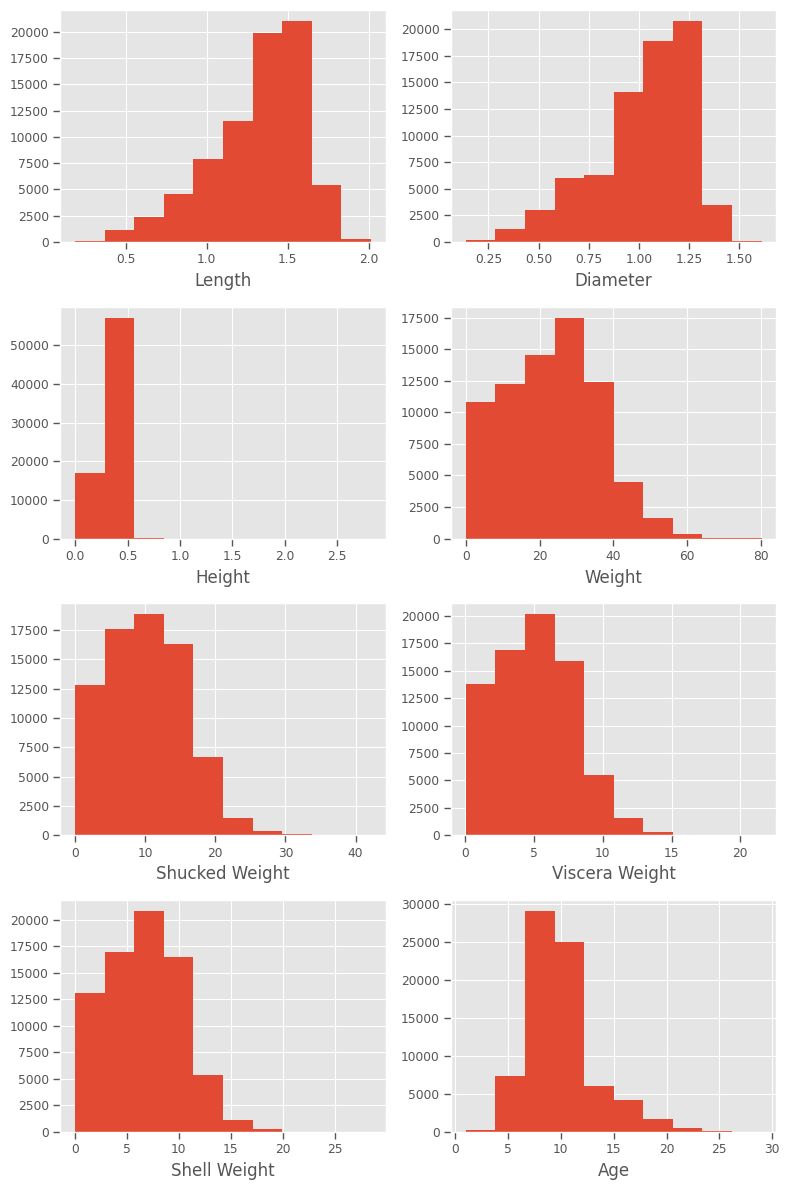

In [68]:
# fig, axs = plt.subplots(len(df_fin.drop('Sex',1).columns), len(df_fin.drop('Sex',1).columns), figsize=(10, 10))

fig_width = 8
fig_height = 3 * num_rows

# Plot histograms for all columns against each other
fig, axs = plt.subplots(num_rows, 2, figsize=(fig_width, fig_height))

for i, column1 in enumerate(df.drop('Sex',1).columns):
    row = i // 2
    col = i % 2
    axs[row, col].hist(df[column1])
    axs[row, col].set_xlabel(column1)

# Remove empty subplots if the number of columns is odd
if num_cols % 2 != 0:
    fig.delaxes(axs[num_rows - 1, 1])

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='Age'>

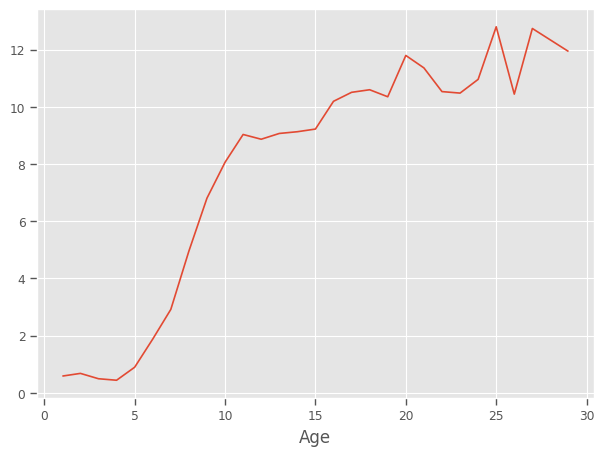

In [72]:
df['Shell Weight'].groupby(df['Age']).mean().plot.line()

In [111]:
df['Age'].groupby(df['Sex']).mean()

Sex
F    11.341547
I     7.599073
M    10.895953
Name: Age, dtype: float64

<AxesSubplot: xlabel='Sex'>

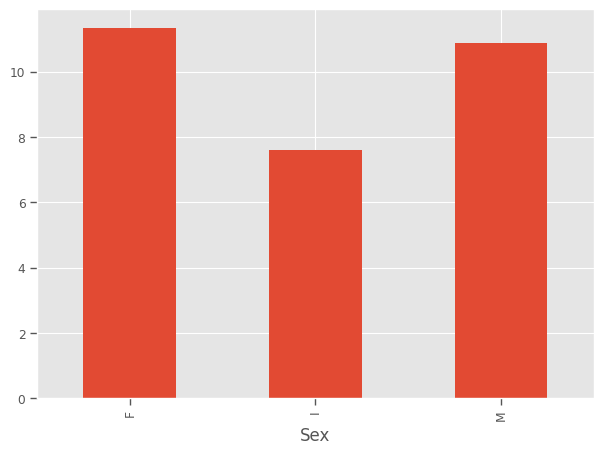

In [110]:
df['Age'].groupby(df['Sex']).mean().plot.bar()

In [73]:
# This means shell weight continious to grow with age

In [86]:
df['Shell Weight'].groupby(df['Age']).mean()

Age
1      0.582937
2      0.677351
3      0.490422
4      0.437707
5      0.892284
6      1.877023
7      2.914198
8      4.953074
9      6.804733
10     8.059078
11     9.032142
12     8.865764
13     9.067574
14     9.128342
15     9.221308
16    10.192044
17    10.506033
18    10.596270
19    10.350750
20    11.795066
21    11.360445
22    10.531695
23    10.478920
24    10.959037
25    12.797774
26    10.443061
27    12.738375
29    11.934352
Name: Shell Weight, dtype: float64

In [94]:
df_fin.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [102]:
from sklearn.preprocessing import MinMaxScaler
df_norm = pd.DataFrame(MinMaxScaler().fit_transform(df_fin[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']]), columns=['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight']).merge(df_fin['Age'], on=df_fin.index)

In [106]:
df_norm.drop('key_0',1, inplace=True)

/var/folders/f_/7l28g95x4l770x2zh0g55rt80000gn/T/ipykernel_73758/491572173.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_norm.drop('key_0',1, inplace=True)


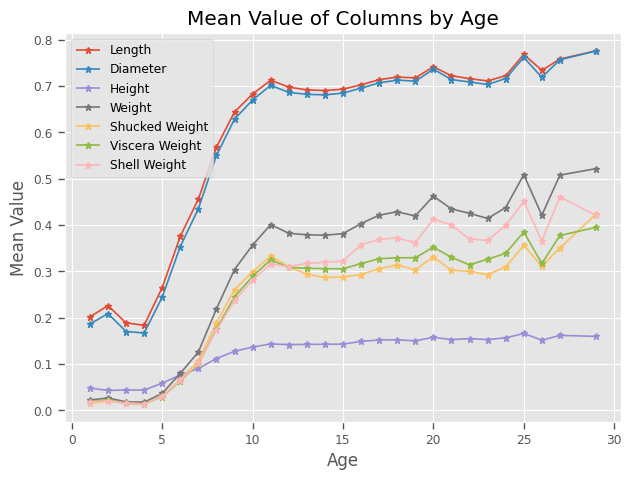

In [107]:
# Group by 'Age' and calculate the mean for each column
grouped = df_norm.groupby('Age').mean()

# Plot line graph for each column
grouped.plot.line(marker='*')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.title('Mean Value of Columns by Age')

# Show the plot
plt.show()

An interesting Oversvation, The overall properties like height weight diameter exponentially grows by the age of 5 - 10 and then reaches saturation point


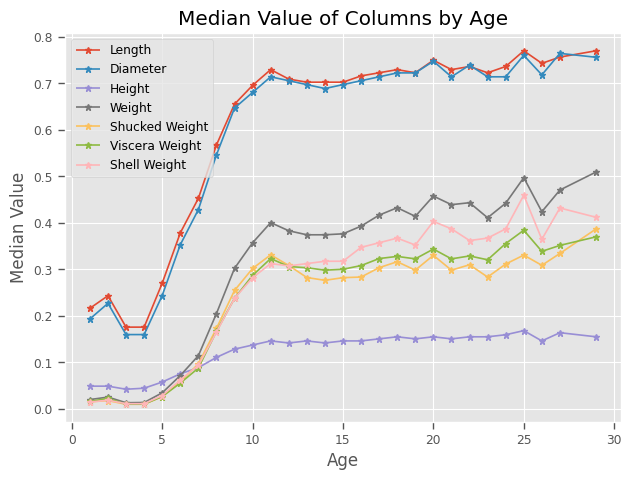

In [108]:
# Group by 'Age' and calculate the mean for each column
grouped = df_norm.groupby('Age').median()

# Plot line graph for each column
grouped.plot.line(marker='*')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median Value')
plt.title('Median Value of Columns by Age')

# Show the plot
plt.show()